# developer: Mohammad mehdi Sahraei

### installing yolov5

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 8.44 MiB/s, done.
Resolving deltas: 100% (10746/10746), done.


In [3]:
%cd yolov5

/content/yolov5


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.5 MB/s eta 0:00:00


### installing kaggle and downloading dataset
- [link dataset](https://www.kaggle.com/datasets/wangwanqi/parking)

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%ls
#upload your json file in sample_data path

benchmarks.py    data/       LICENSE          requirements.txt  tutorial.ipynb
CITATION.cff     detect.py   models/          segment/          utils/
classify/        export.py   README.md        setup.cfg         val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py


In [5]:
from IPython.display import Image

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/sample_data" # path

In [ ]:
!chmod 600 /content/sample_data/kaggle.json

In [ ]:
!kaggle datasets download -d wangwanqi/parking

 98% 422M/431M [00:16<00:00, 42.0MB/s]
100% 431M/431M [00:16<00:00, 26.8MB/s]


In [ ]:
!unzip parking.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/2013-04-16_07_20_01_jpg.rf.4bff58ad3418a8a1b5972109368ffb86.txt  
  inflating: train/labels/2013-04-16_07_30_01_jpg.rf.c2d58c623fe65564693f34c91165adf9.txt  
  inflating: train/labels/2013-04-16_07_35_01_jpg.rf.b8bb993a0295612fd7ad73f70d51b4df.txt  
  inflating: train/labels/2013-04-16_07_45_02_jpg.rf.3eb6946ea65e3507c55f8d0d399d2155.txt  
  inflating: train/labels/2013-04-16_07_55_02_jpg.rf.b7ecaf2c30a7c28806e8290756bbf44b.txt  
  inflating: train/labels/2013-04-16_08_00_02_jpg.rf.ec5ab8fb4f8579759ea8fef07927a55c.txt  
  inflating: train/labels/2013-04-16_08_05_02_jpg.rf.2bd8d1cd09d7d60bab50c00b6d47ec4d.txt  
  inflating: train/labels/2013-04-16_08_10_02_jpg.rf.da4fe36e17e726581df3ef36f84a7ae6.txt  
  inflating: train/labels/2013-04-16_08_15_02_jpg.rf.acead01292c6102c3ea4e32bbf701fe1.txt  
  inflating: train/labels/2013-04-16_08_20_02_jpg.rf.6a9f758bf3f7b6d0ce3aebf51eb07c53.txt  
  inflating: train/labels/201

In [ ]:
!mv /content/yolov5/train /content/yolov5/dataset
!mv /content/yolov5/valid /content/yolov5/dataset

### Training and Creating new model-(weights yolov5s.pt)
- [link yolov5](https://github.com/ultralytics/yolov5)

In [ ]:
%pwd

'/content/yolov5'

In [41]:
!python train.py --img 120 --batch 16 --epochs 30 --data /content/yolov5/data/data.yaml --weights yolov5s.pt --cache #--cache showing details 

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=120, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

### using trained model with yolov5

In [42]:
!cp -r /content/yolov5/runs/train/exp13 /content/drive/MyDrive

In [28]:
!python detect.py --source /content/sample_data/123.jpg --weights /content/drive/MyDrive/exp13/weights/last.pt --conf 0.40

detect: weights=['/content/drive/MyDrive/exp13/weights/last.pt'], source=/content/sample_data/123.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/sample_data/123.jpg: 640x640 70 space-emptys, 35 space-occupieds, 11.5ms
Speed: 0.5ms pre-process, 11.5ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


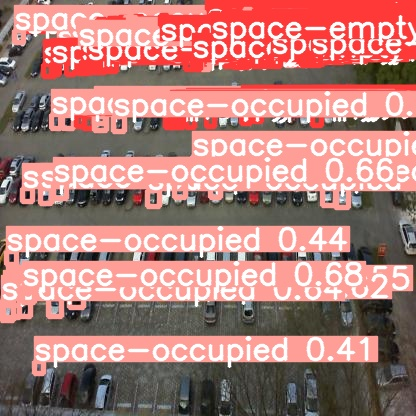

In [29]:
Image('/content/yolov5/runs/detect/exp7/123.jpg')

### for showing results and graph


In [25]:
# %load_ext tensorboard
# %tensorboard --logdir runs